# Import Library dan mount drive

In [ ]:
# import library
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir(r'/content/drive/My Drive/Permata ITS/KK/')

# Load Dataset

In [ ]:
# melakukan load dari csv ke dalam bentuk pandas dataframe
df=pd.read_csv('Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,NaN,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,NaN,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Description dan analisa

In [ ]:
# melihat tipe dari tiap kolom di dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  148 non-null    float64
 2   SepalWidthCm   149 non-null    float64
 3   PetalLengthCm  144 non-null    float64
 4   PetalWidthCm   146 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# melihat persebaran data dari setiap kolom, seperti variance dan std
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,148.000000,149.00000,144.000000,146.000000
mean,75.500000,5.827703,3.05302,3.747222,1.184247
std,43.445368,0.818479,0.43489,1.775590,0.763810
min,1.000000,4.300000,2.00000,1.000000,0.100000
25%,38.250000,5.100000,2.80000,1.575000,0.300000
50%,75.500000,5.800000,3.00000,4.350000,1.300000
75%,112.750000,6.400000,3.30000,5.100000,1.800000
max,150.000000,7.900000,4.40000,6.900000,2.500000


In [ ]:
# melihat jumlah missing value
df.isna().sum()

Id               0
SepalLengthCm    2
SepalWidthCm     1
PetalLengthCm    6
PetalWidthCm     4
Species          0
dtype: int64

In [ ]:
# melihat data yang memiliki missing value
df[df.isna().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,13,4.8,3.0,NaN,0.1,Iris-setosa
55,56,5.7,2.8,NaN,1.3,Iris-versicolor
57,58,4.9,2.4,NaN,1.0,Iris-versicolor
59,60,5.2,2.7,NaN,1.4,Iris-versicolor
60,61,5.0,2.0,3.5,NaN,Iris-versicolor
72,73,6.3,2.5,4.9,NaN,Iris-versicolor
128,129,6.4,2.8,5.6,NaN,Iris-virginica
135,136,NaN,3.0,6.1,2.3,Iris-virginica
143,144,6.8,NaN,NaN,NaN,Iris-virginica
146,147,NaN,2.5,5.0,1.9,Iris-virginica


In [ ]:
# melihat jumlah setiap kelas di kolom target
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
labels=['Iris-virginica','Iris-versicolor', 'Iris-setosa ']

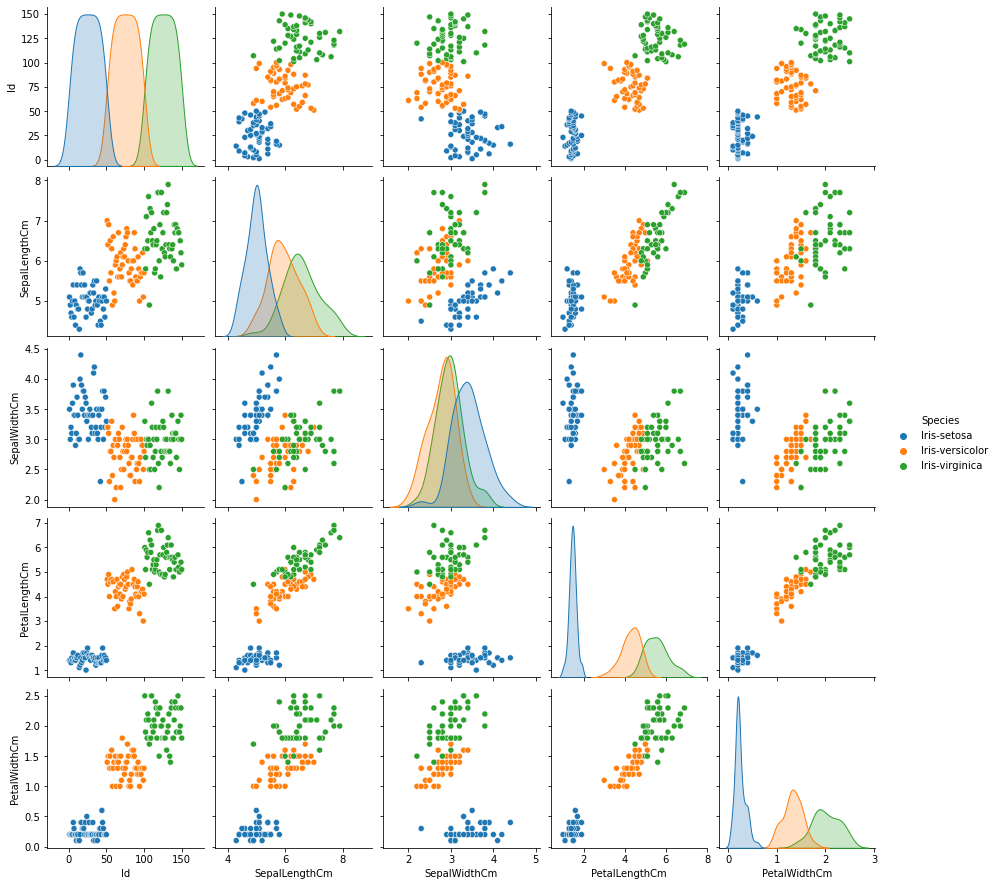

In [ ]:
# distribusi data dari satu kolom ke kolom yang lain
sns.pairplot(df,hue="Species")

# PraProses


`Ini kalian bisa melakukan pra proses menyesuaikan kondisi data.
Beberapa masalah yang harus diatasi:
Missing Value
Extreme Value (outlier)
Encoding atribut kateogrikal
Normalisasi
Feature engineering
dll.
Intinya menyesuaikan problem!`

## Handling Missing Value

In [ ]:
df.mean()

Id               75.500000
SepalLengthCm     5.827703
SepalWidthCm      3.053020
PetalLengthCm     3.747222
PetalWidthCm      1.184247
dtype: float64

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Label Encoder

In [ ]:
# label encoder
# dictionary buat mappingnya
dic = {"Iris-setosa":1, "Iris-versicolor":2,'Iris-virginica':3}

#dimapping ke kolom baru 
df['Target']=df.Species.replace(dic)

In [ ]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


# Train Test Split


In [ ]:
# X adalah kolom attribut tanpa kolom target
X=df.iloc[:,1:-2]
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
# y adalah kolom yang hanya target
y=df.iloc[:,-1]
y.head(2)

0    1
1    1
Name: Target, dtype: int64

In [ ]:
# untuk memisahkan data train dan test -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# param stratify : data displit secara stratified -> https://scikit-learn.org/stable/modules/cross_validation.html#stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=77,stratify=y) 

# Normalisasi

In [ ]:
# untuk mengatasi perbedaan nilai antar kolom -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #tanpa target
X_test_scaled = scaler.transform(X_test)

# Evaluation

In [ ]:
# function untuk melakukan perhitungan seluruh metric evaluasi -> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]

# Model

In [ ]:
kolom=['Model','Acc','Precision','Recall','F1']
HASIL_AKHIR=pd.DataFrame(columns=kolom)

## K-NN

In [ ]:
# fit model KNN -> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # default nilai k = 5
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# predict model ke data test
y_pred_knn=knn.predict(X_test)

In [ ]:
# evaluation score untuk model KNN
get_metrics(y_test,y_pred_knn)

[0.9733, 0.9733, 0.9733, 0.9733]

In [ ]:
hasil=['knn']+get_metrics(y_test,y_pred_knn)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## SVM

In [ ]:
# fit model SVM -> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict model ke data test
y_pred_svm=clf.predict(X_test)

In [ ]:
# evaluation score untuk model SVM
get_metrics(y_test,y_pred_svm)

[0.9733, 0.9733, 0.9733, 0.9733]

In [ ]:
hasil=['svm']+get_metrics(y_test,y_pred_svm)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## Random Forest

In [ ]:
# fit model Random Forest -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# predict model ke data test
y_pred_rf=rf.predict(X_test)

In [ ]:
# evaluation score untuk model Random Forest
get_metrics(y_test,y_pred_rf)

[0.9467, 0.9485, 0.9467, 0.9466]

In [ ]:
hasil=['RF']+get_metrics(y_test,y_pred_rf)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## XGBoost

In [ ]:
# run di local -> pip install xgboost

# fit model XGBoost -> https://xgboost.readthedocs.io/en/latest/
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# predict model ke data test
y_pred_xgb=xgb.predict(X_test)

In [ ]:
# evaluation score untuk model XGBoost
get_metrics(y_test,y_pred_xgb)

[0.9467, 0.9485, 0.9467, 0.9466]

In [ ]:
hasil=['XGB']+get_metrics(y_test,y_pred_xgb)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## MLP

In [ ]:
# fit model MLP -> https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=3000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# predict model ke data test
y_pred_mlp=mlp.predict(X_test)

In [ ]:
# evaluation score untuk model MLP
get_metrics(y_test,y_pred_mlp)

[0.9467, 0.9467, 0.9467, 0.9467]

In [ ]:
hasil=['mlp']+get_metrics(y_test,y_pred_mlp)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

# Decision Tree

In [ ]:
# fit model Decision Tree -> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# predict model ke data test
y_pred_dt=dt.predict(X_test)

In [ ]:
# evaluation score untuk model Decision Tree
get_metrics(y_test,y_pred_dt)

[0.9333, 0.9338, 0.9333, 0.9333]

In [ ]:
hasil=['dt']+get_metrics(y_test,y_pred_dt)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## Hasil Akhir

In [ ]:
# dataframe perbandingan model
from IPython.display import display 
print("Agung Prabowo-5998201143-KELAS KK E")
display(HASIL_AKHIR)
print("Hasil terbaik didapatkan dari model dengan menggunakan metode knn dan svm karena memiliki akurasi terbaik dan juga presisi terbaik")

Nabilla Kansha-5998201097-KELAS KK E


,Model,Acc,Precision,Recall,F1
0,knn,0.9733,0.9733,0.9733,0.9733
0,svm,0.9733,0.9733,0.9733,0.9733
0,RF,0.9467,0.9485,0.9467,0.9466
0,XGB,0.9467,0.9485,0.9467,0.9466
0,mlp,0.9467,0.9467,0.9467,0.9467
0,dt,0.9333,0.9338,0.9333,0.9333


Hasil terbaik didapatkan dari model dengan menggunakan metode knn dan svm karena memiliki akurasi terbaik dan juga presisi terbaik


# CrossVal

In [ ]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
rf_cv = RandomForestClassifier()
cv_results = cross_validate(rf_cv, X_scaled , y, cv=5)
# sorted(cv_results.keys())
cv_results

{'fit_time': array([0.13757062, 0.12900615, 0.12316513, 0.12236881, 0.12635446]),
 'score_time': array([0.00858021, 0.00755906, 0.0078454 , 0.00740361, 0.00773311]),
 'test_score': array([0.96666667, 0.93333333, 0.93333333, 0.96666667, 0.96666667])}

In [ ]:
cv_results['test_score'].mean()

0.9533333333333334

# Random Search

In [ ]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection as model_selection

In [ ]:
# parameter yang ingin diujicoba
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [700, 800, 900, 1000, 1100, 1200]
}

In [ ]:
# inisiasi model
clf = RandomForestClassifier()

In [ ]:
grid_search = RandomizedSearchCV(clf, param_grid, random_state=77,n_iter=10,cv=2)

In [ ]:
# melakukan fit gridsearch
grid_search.fit(X_scaled, y)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# parameter grid search terbaik
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 1000}

In [ ]:
# skor grid serach terbaik
grid_search.best_score_

0.96

# Confusion Matrix

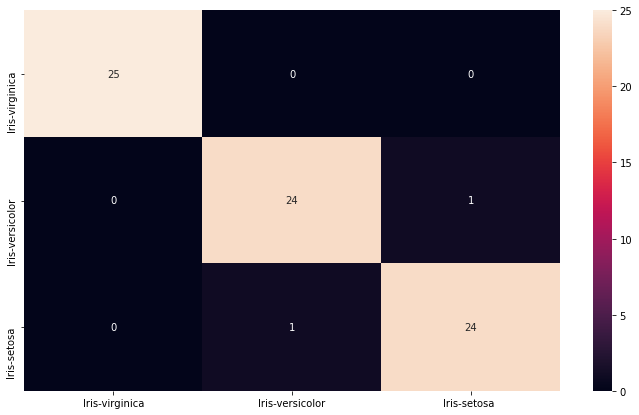

In [ ]:
# Confusion Matrix dari model knn sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_test,y_pred_knn)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.96      0.96      0.96        25
           3       0.96      0.96      0.96        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

